# `Feature Matching`
- ### Extracts key features from an input image (using ideas from corner, edge, and contour detection) and then matches those features to other images.
- ### Used in object recognition, and augmented reality.

In [111]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [112]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

## Single Cereal

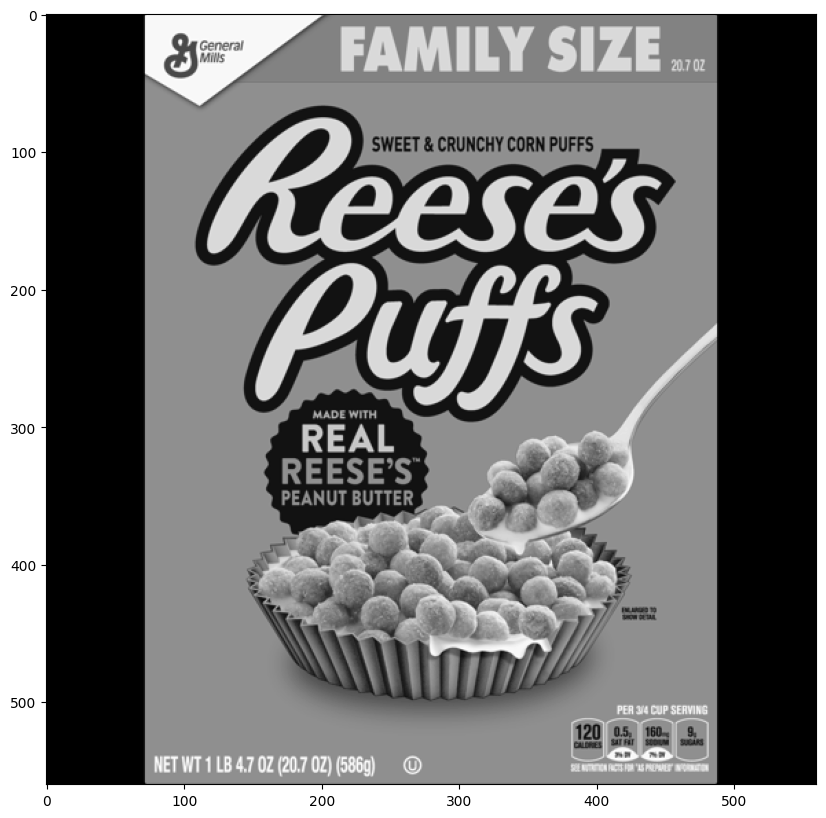

In [113]:
reeses = cv2.imread("../DATA/reeses_puffs.png", 0)

display_img(reeses)

## Many Cereals

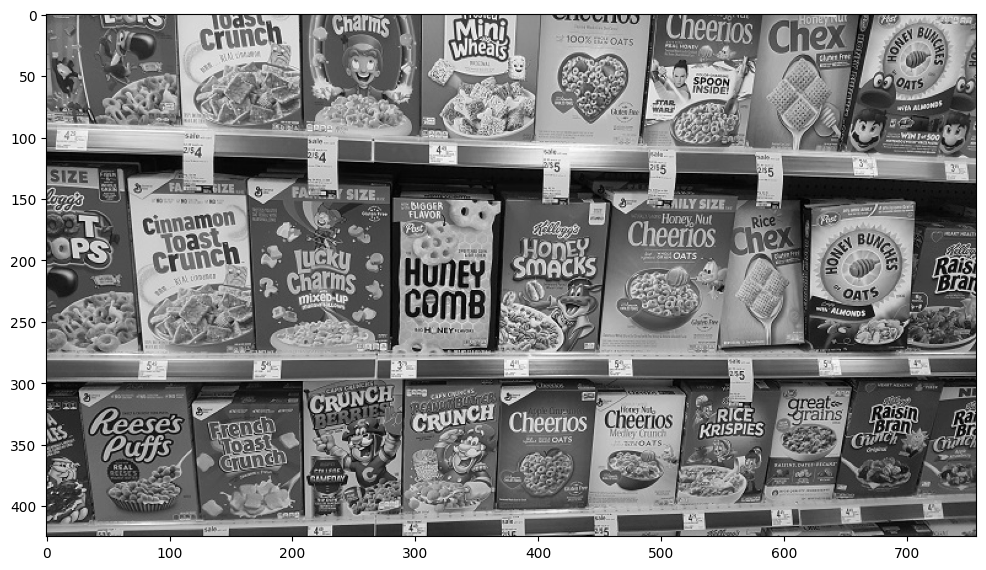

In [114]:
cereals = cv2.imread("../DATA/many_cereals.jpg", 0)

display_img(cereals)

## `Method 1`
## Brute-Force Matching with ORB Descriptors

In [115]:
orb = cv2.ORB_create()

In [116]:
kp1, des1 = orb.detectAndCompute(reeses, None) # kp1 = key points, des1 = descriptors
kp2, des2 = orb.detectAndCompute(cereals, None)

In [117]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [118]:
matches = bf.match(des1, des2)

In [119]:
single_match = matches[0]
single_match.distance

56.0

In [120]:
matches = sorted(matches, key=lambda x:x.distance)

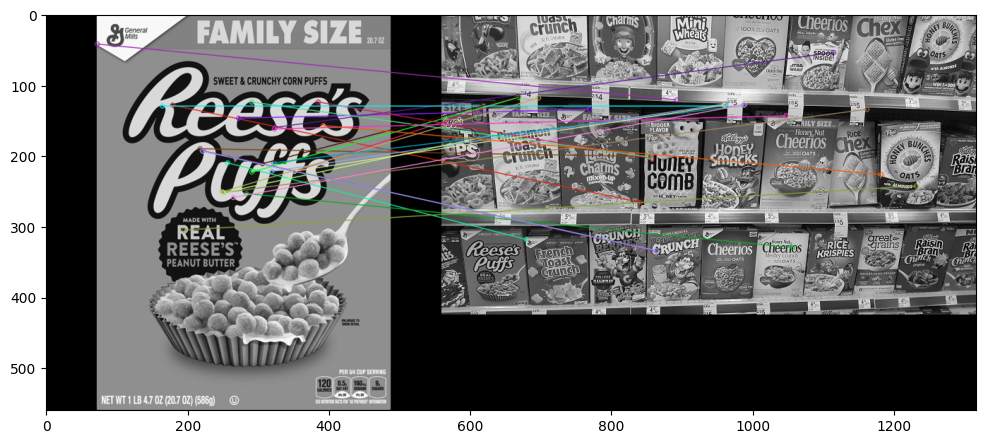

In [121]:
reeses_matches = cv2.drawMatches(reeses,
                                 kp1,
                                 cereals,
                                 kp2,
                                 matches[:25],
                                 None,
                                 flags=2
                                 )

display_img(reeses_matches)

### Not a good result

## `Method 2`
## Brute-Force Matching with SIFT Descriptors and Ratio Test

#### **Sift**: **S**cale **I**nvariant **F**eature **T**ransform

In [122]:
sift = cv2.SIFT_create()

In [123]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [124]:
bf = cv2.BFMatcher()

In [125]:
matches = bf.knnMatch(des1, des2, k=2) # 2 Best matches

In [126]:
matches

((< cv2.DMatch 0000016B150E2950>, < cv2.DMatch 0000016B1502F010>),
 (< cv2.DMatch 0000016B1502E450>, < cv2.DMatch 0000016B1502FCB0>),
 (< cv2.DMatch 0000016B15348C50>, < cv2.DMatch 0000016B15348B90>),
 (< cv2.DMatch 0000016B14F9B990>, < cv2.DMatch 0000016B14C31B30>),
 (< cv2.DMatch 0000016B14C32030>, < cv2.DMatch 0000016B14C32250>),
 (< cv2.DMatch 0000016B14C31E10>, < cv2.DMatch 0000016B14C321F0>),
 (< cv2.DMatch 0000016B14C323D0>, < cv2.DMatch 0000016B14C32390>),
 (< cv2.DMatch 0000016B14C30630>, < cv2.DMatch 0000016B14C32330>),
 (< cv2.DMatch 0000016B14C31D50>, < cv2.DMatch 0000016B14C31C90>),
 (< cv2.DMatch 0000016B14C32070>, < cv2.DMatch 0000016B14C320D0>),
 (< cv2.DMatch 0000016B14C31750>, < cv2.DMatch 0000016B14C324B0>),
 (< cv2.DMatch 0000016B14C32770>, < cv2.DMatch 0000016B14C327D0>),
 (< cv2.DMatch 0000016B14C326F0>, < cv2.DMatch 0000016B14C327B0>),
 (< cv2.DMatch 0000016B14C325D0>, < cv2.DMatch 0000016B14C31610>),
 (< cv2.DMatch 0000016B14C32270>, < cv2.DMatch 0000016B14C31BF

### Storing good matches by using the ratio test

In [127]:
good = []

for match1, match2 in matches:
    # 75% of the distance of the first match should be less than the second match
    if match1.distance < 0.75*match2.distance:
        good.append(match1)

In [128]:
good

[< cv2.DMatch 0000016B150E2950>,
 < cv2.DMatch 0000016B14C330B0>,
 < cv2.DMatch 0000016B14C33670>,
 < cv2.DMatch 0000016B14C336B0>,
 < cv2.DMatch 0000016B14C338B0>,
 < cv2.DMatch 0000016B14C33EB0>,
 < cv2.DMatch 0000016B153741F0>,
 < cv2.DMatch 0000016B15374370>,
 < cv2.DMatch 0000016B153746F0>,
 < cv2.DMatch 0000016B15374930>,
 < cv2.DMatch 0000016B15374CF0>,
 < cv2.DMatch 0000016B15374DF0>,
 < cv2.DMatch 0000016B15376070>,
 < cv2.DMatch 0000016B153760B0>,
 < cv2.DMatch 0000016B153761B0>,
 < cv2.DMatch 0000016B15376F30>,
 < cv2.DMatch 0000016B153778B0>,
 < cv2.DMatch 0000016B15377970>,
 < cv2.DMatch 0000016B15377A30>,
 < cv2.DMatch 0000016B153A82F0>,
 < cv2.DMatch 0000016B153A8430>,
 < cv2.DMatch 0000016B153A9530>,
 < cv2.DMatch 0000016B153A9670>,
 < cv2.DMatch 0000016B153A96B0>,
 < cv2.DMatch 0000016B153A9870>,
 < cv2.DMatch 0000016B153A98B0>,
 < cv2.DMatch 0000016B153AAAB0>,
 < cv2.DMatch 0000016B153AAC30>,
 < cv2.DMatch 0000016B153AAC70>,
 < cv2.DMatch 0000016B153AB230>,
 < cv2.DMa

In [129]:
len(good)

79

In [130]:
len(matches)

1501

In [131]:
def drawMatches(img1, kp1, img2, kp2, matches):
    """
    My own implementation of cv2.drawMatches as OpenCV 2.4.9
    does not have this function available but it's supported in
    OpenCV 3.0.0

    This function takes in two images with their associated 
    keypoints, as well as a list of DMatch data structure (matches) 
    that contains which keypoints matched in which images.

    An image will be produced where a montage is shown with
    the first image followed by the second image beside it.

    Keypoints are delineated with circles, while lines are connected
    between matching keypoints.

    img1,img2 - Grayscale images
    kp1,kp2 - Detected list of keypoints through any of the OpenCV keypoint 
              detection algorithms
    matches - A list of matches of corresponding keypoints through any
              OpenCV keypoint matching algorithm
    """

    # Create a new output image that concatenates the two images together
    # (a.k.a) a montage
    rows1 = img1.shape[0]
    cols1 = img1.shape[1]
    rows2 = img2.shape[0]
    cols2 = img2.shape[1]

    # Create the output image
    # The rows of the output are the largest between the two images
    # and the columns are simply the sum of the two together
    # The intent is to make this a colour image, so make this 3 channels
    out = np.zeros((max([rows1,rows2]),cols1+cols2,3), dtype='uint8')

    # Place the first image to the left
    out[:rows1,:cols1] = np.dstack([img1, img1, img1])

    # Place the next image to the right of it
    out[:rows2,cols1:] = np.dstack([img2, img2, img2])

    # For each pair of points we have between both images
    # draw circles, then connect a line between them
    for mat in matches:

        # Get the matching keypoints for each of the images
        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx

        # x - columns
        # y - rows
        (x1,y1) = kp1[img1_idx].pt
        (x2,y2) = kp2[img2_idx].pt

        # Draw a small circle at both co-ordinates
        # radius 4
        # colour blue
        # thickness = 1
        cv2.circle(out, (int(x1),int(y1)), 4, (255, 0, 0), 1)   
        cv2.circle(out, (int(x2)+cols1,int(y2)), 4, (255, 0, 0), 1)

        # Draw a line in between the two points
        # thickness = 1
        # colour blue
        cv2.line(out, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), (255,0,0), 1)


    # Show the image
    cv2.imshow('Matched Features', out)
    cv2.waitKey(0)
    cv2.destroyWindow('Matched Features')

    # Also return the image if you'd like a copy
    return out

In [132]:
gray1 = cv2.cvtColor(reeses, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(cereals, cv2.COLOR_BGR2GRAY)

drawMatches(gray1, kp1, gray2, kp2, good)

error: OpenCV(4.6.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xf2302844::Set<1,-1,-1>,struct cv::impl::A0xf2302844::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


## `Method 3`
## Flann-Based Matching

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

AttributeError: module 'cv2' has no attribute 'xfeatures2d'